# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | benguela
Processing Record 2 of Set 1 | port hardy
Processing Record 3 of Set 1 | bichura
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | la ronge
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | cascais
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | redmond
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | chilca
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | iquitos
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | liling
Processing Record 18 of Set 1 | touros
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | ayan
Processing Record 21 of Set 1 | luderitz
Processing Record 22 of Set 1 | elko
Processing Record 23 of Set 1 | if

Processing Record 37 of Set 4 | suda
Processing Record 38 of Set 4 | xining
Processing Record 39 of Set 4 | pirovskoye
Processing Record 40 of Set 4 | praya
Processing Record 41 of Set 4 | ludvika
Processing Record 42 of Set 4 | verkhnyaya inta
Processing Record 43 of Set 4 | almaznyy
Processing Record 44 of Set 4 | esperantinopolis
Processing Record 45 of Set 4 | husavik
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | torbay
Processing Record 48 of Set 4 | turuvekere
Processing Record 49 of Set 4 | maldonado
Processing Record 0 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | lata
Processing Record 3 of Set 5 | varel
Processing Record 4 of Set 5 | kadykchan
City not found. Skipping...
Processing Record 5 of Set 5 | tabialan
City not found. Skipping...
Processing Record 6 of Set 5 | finschhafen
Processing Record 7 of Set 5 | soja
Processing Record 8 of Set 5 | maihar
Processing Record 9

Processing Record 25 of Set 8 | ruwi
Processing Record 26 of Set 8 | isangel
Processing Record 27 of Set 8 | portland
Processing Record 28 of Set 8 | bulawayo
Processing Record 29 of Set 8 | samarai
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | keita
Processing Record 32 of Set 8 | wenatchee
Processing Record 33 of Set 8 | alyangula
Processing Record 34 of Set 8 | glendive
Processing Record 35 of Set 8 | camalu
Processing Record 36 of Set 8 | mahibadhoo
Processing Record 37 of Set 8 | santa rosa
Processing Record 38 of Set 8 | usinsk
Processing Record 39 of Set 8 | vila velha
Processing Record 40 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 41 of Set 8 | gamba
Processing Record 42 of Set 8 | laela
Processing Record 43 of Set 8 | craig
Processing Record 44 of Set 8 | baruun-urt
Processing Record 45 of Set 8 | flinders
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | tonantins
Processing Record 48 of Set 8 | kilemb

Processing Record 12 of Set 12 | montbrison
Processing Record 13 of Set 12 | sfantu gheorghe
Processing Record 14 of Set 12 | fortuna foothills
Processing Record 15 of Set 12 | toliary
City not found. Skipping...
Processing Record 16 of Set 12 | conselheiro pena
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | port augusta
Processing Record 19 of Set 12 | elat
Processing Record 20 of Set 12 | vestmanna
Processing Record 21 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 22 of Set 12 | margate
Processing Record 23 of Set 12 | udachnyy
Processing Record 24 of Set 12 | stephenville
Processing Record 25 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 26 of Set 12 | charters towers
Processing Record 27 of Set 12 | port lincoln
Processing Record 28 of Set 12 | bocana de paiwas
Processing Record 29 of Set 12 | poronaysk
Processing Record 30 of Set 12 | puerto suarez
Processing Record 31 of Set 12 | mushie
Processing Record 32

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,benguela,-12.5763,13.4055,83.12,68,14,9.10,AO,1674661271
1,port hardy,50.6996,-127.4199,35.78,100,100,2.30,CA,1674661272
2,bichura,50.5881,107.6022,-11.16,96,96,3.87,RU,1674661272
3,avarua,-21.2078,-159.7750,73.45,94,30,5.75,CK,1674661273
4,la ronge,55.1001,-105.2842,16.05,79,100,8.05,CA,1674661273


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benguela,-12.5763,13.4055,83.12,68,14,9.10,AO,1674661271
1,port hardy,50.6996,-127.4199,35.78,100,100,2.30,CA,1674661272
2,bichura,50.5881,107.6022,-11.16,96,96,3.87,RU,1674661272
3,avarua,-21.2078,-159.7750,73.45,94,30,5.75,CK,1674661273
4,la ronge,55.1001,-105.2842,16.05,79,100,8.05,CA,1674661273


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

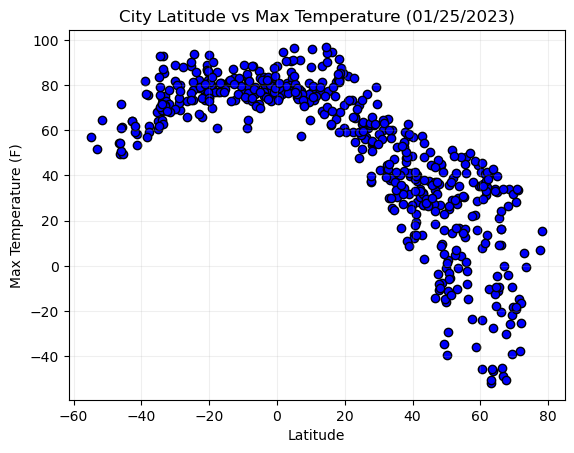

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],c="blue",edgecolors="black")

# Incorporate the other graph properties
todayDate = dt.datetime.today().strftime("%m/%d/%Y")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

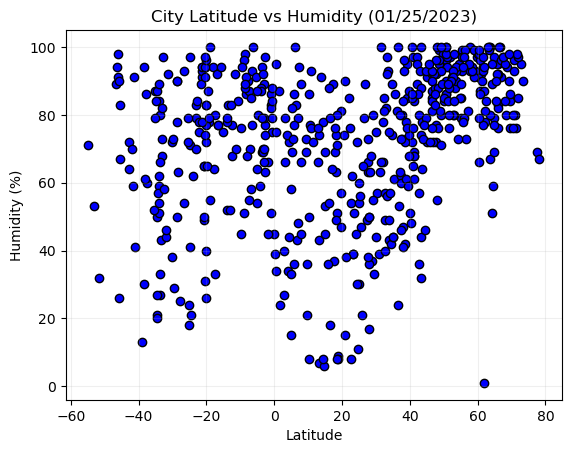

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

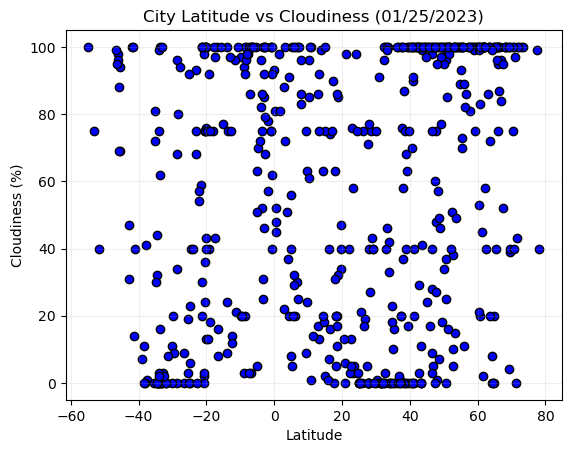

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

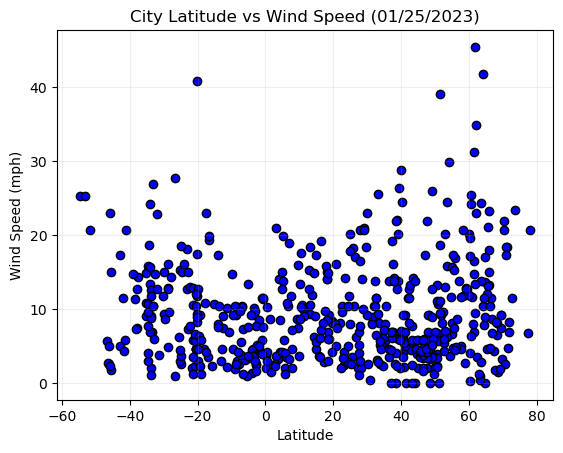

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],c="blue",edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({todayDate})")
plt.grid(alpha=.2)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def linRegressionPlot(xvalue,yvalue):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    linRegressLine = xvalue * slope + intercept
    
    print(f"The r-value is: {rvalue:}")
    
    plt.scatter(xvalue,yvalue)
    plt.plot(xvalue,linRegressLine,"r-")
    lineLabelX = np.random.randint(xvalue.min(),xvalue.max())
    lineLabelY = lineLabelX * slope + intercept
    plt.annotate(text=f"y={slope:,.2f}x + {intercept:,.2f}",xy=(lineLabelX,lineLabelY),textcoords="offset points",
                 xytext=(0,10),fontsize=15,color="black",bbox={"facecolor":"red","alpha":.5,"pad":5})
    plt.xlabel(xvalue.name)
    plt.ylabel(yvalue.name)
    return

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port hardy,50.6996,-127.4199,35.78,100,100,2.30,CA,1674661272
2,bichura,50.5881,107.6022,-11.16,96,96,3.87,RU,1674661272
4,la ronge,55.1001,-105.2842,16.05,79,100,8.05,CA,1674661273
5,nikolskoye,59.7035,30.7861,35.49,97,100,11.86,RU,1674661274
7,cascais,38.6979,-9.4215,57.51,42,0,21.99,PT,1674661275


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benguela,-12.5763,13.4055,83.12,68,14,9.10,AO,1674661271
3,avarua,-21.2078,-159.7750,73.45,94,30,5.75,CK,1674661273
6,alofi,-19.0595,-169.9187,69.69,100,18,1.14,NU,1674661275
11,ushuaia,-54.8000,-68.3000,56.82,71,100,25.32,AR,1674661277
12,chilca,-12.5211,-76.7372,73.60,77,12,7.49,PE,1674661277


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8100126771477181


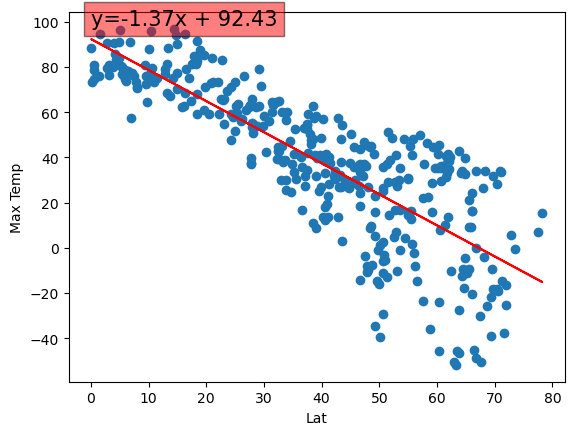

In [71]:
# Linear regression on Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

The r-value is: 0.5480806827237398


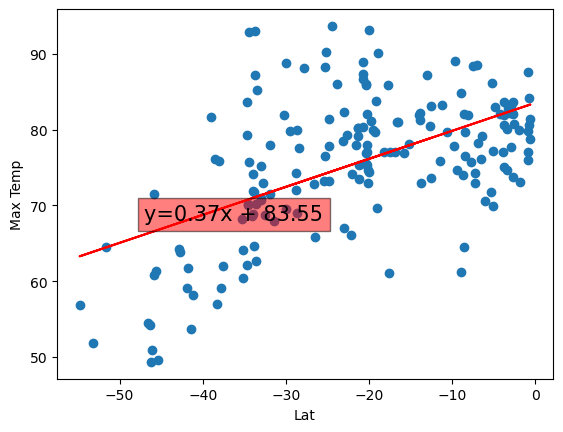

In [72]:
# Linear regression on Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.5338517377087721


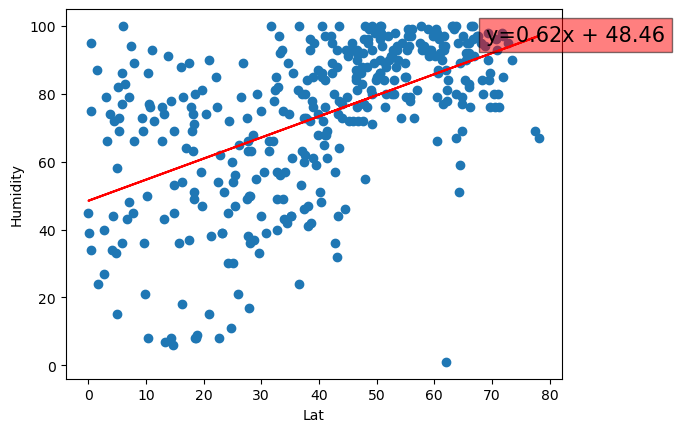

In [73]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

The r-value is: 0.25625826339139035


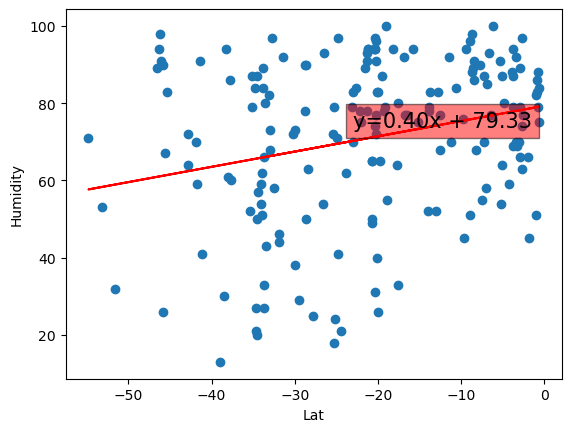

In [74]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29018734636632953


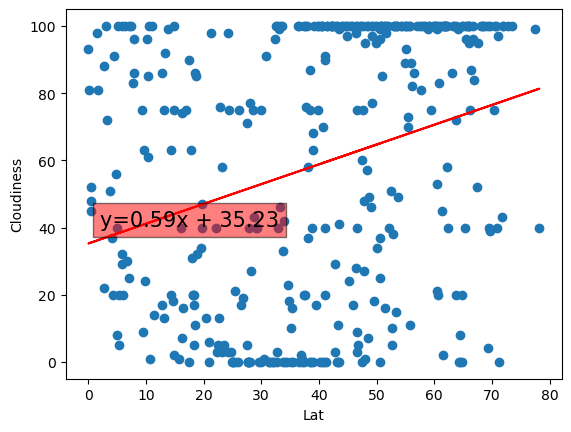

In [75]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

The r-value is: 0.27739094850033297


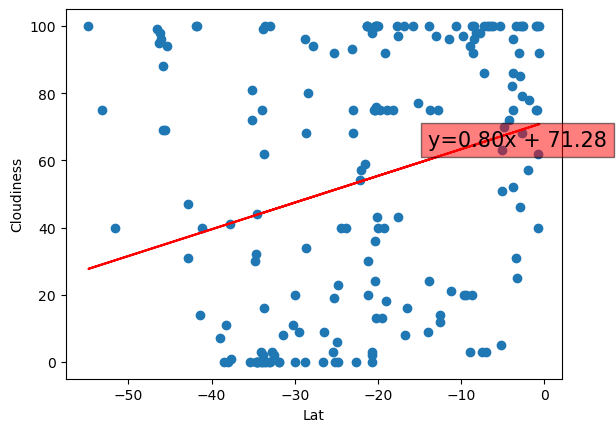

In [76]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1415450387885343


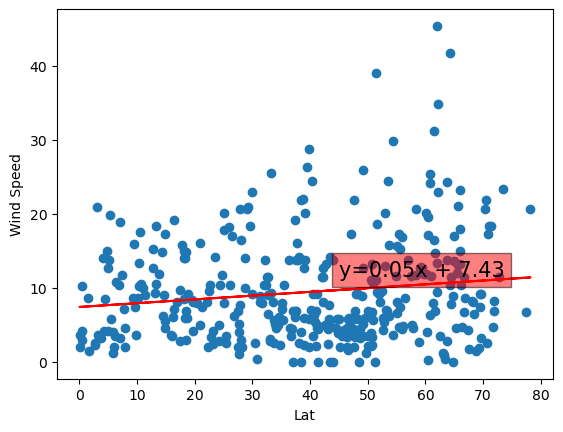

In [77]:
# Northern Hemisphere
linRegressionPlot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

The r-value is: -0.33436613836585416


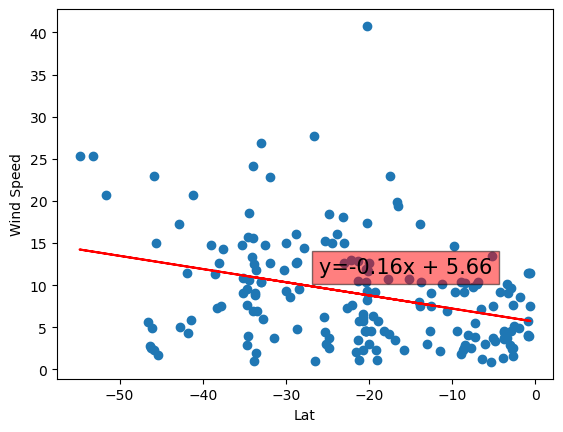

In [78]:
# Southern Hemisphere
linRegressionPlot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE